In [2]:
import pandas as pd
import matplotlib.pyplot as plt

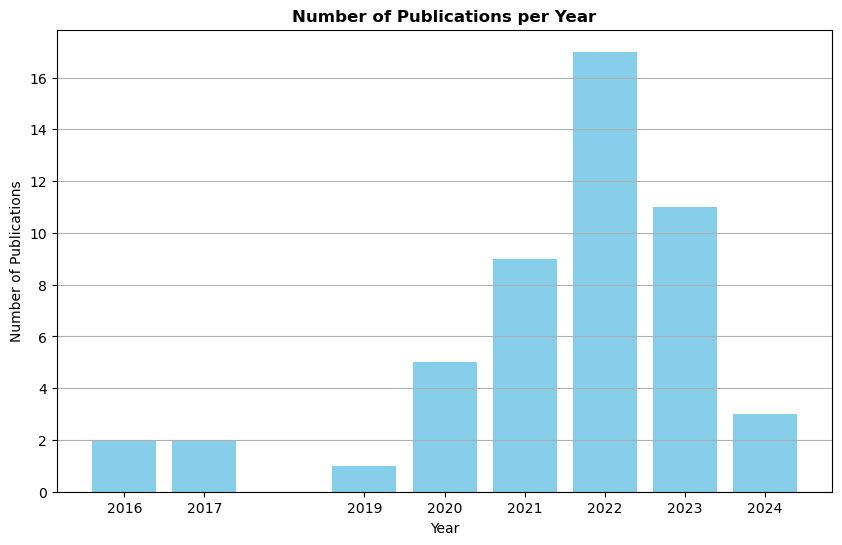

In [3]:
# Load the CSV file
file_path = '/mnt/data/skanda/MSc_IRD_LLM/data/list_of_papers.csv'  # Assuming the CSV is saved with the ID 'image.png'
df = pd.read_csv(file_path, encoding='ISO-8859-1') 

# Count the occurrences of each year
year_counts = df['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Year', fontweight='bold') 
plt.xticks(year_counts.index)
plt.grid(axis='y')

# Show the plot
plt.show()

In [4]:
!pip install pdfplumber

In [5]:
import os
import pdfplumber

def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + " "
    return text

def count_words_in_text(text):
    words = text.split()
    return len(words)

def process_pdfs(directory_path):
    pdf_files = [f for f in os.listdir(directory_path) if f.endswith('.pdf')]
    
    for pdf_file in pdf_files:
        pdf_path = os.path.join(directory_path, pdf_file)
        print(f"Processing: {pdf_file}")
        text = extract_text_from_pdf(pdf_path)
        word_count = count_words_in_text(text)
        print(f"Total word count for {pdf_file}: {word_count} words")

def main():
    # Specify the directory containing the PDF files
    directory_path = '/mnt/data/skanda/MSc_IRD_LLM/data/data_pdf'
    
    # Process all PDFs in the directory and print the word count for each
    process_pdfs(directory_path)

if __name__ == "__main__":
    main()


Processing: IJO-70-2316.pdf
Total word count for IJO-70-2316.pdf: 7871 words
Processing: nihms-1933615.pdf
Total word count for nihms-1933615.pdf: 4138 words
Processing: nihpp-rs3011096v1-compressed.pdf
Total word count for nihpp-rs3011096v1-compressed.pdf: 14714 words
Processing: iovs-63-2-11.pdf


KeyboardInterrupt: 

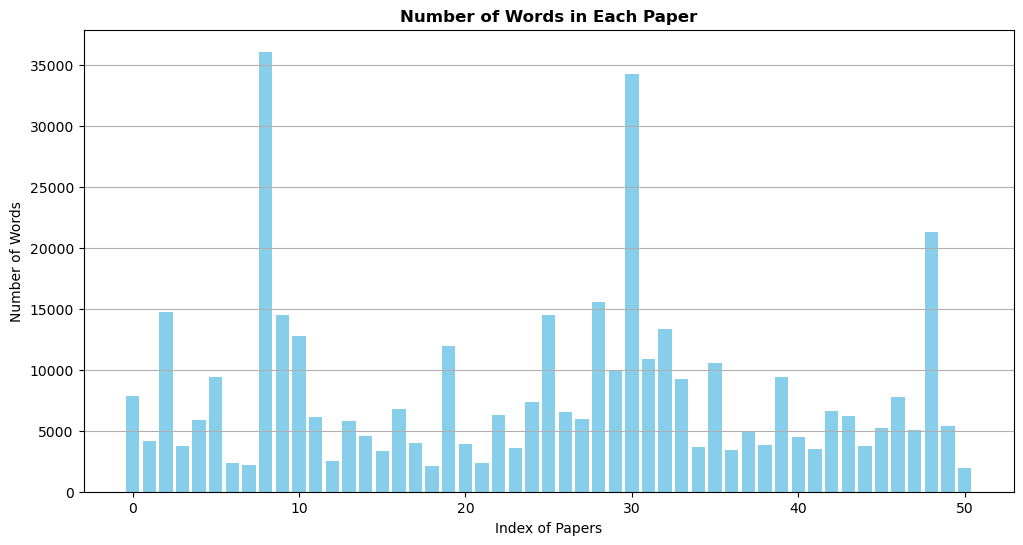

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = '/mnt/data/skanda/MSc_IRD_LLM/data/PDF_Word_Count_Table.csv'
df = pd.read_csv(csv_path)

# Plotting the index of papers on x-axis and number of words on y-axis
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Word Count'], color='skyblue')
plt.xlabel('Index of Papers')
plt.ylabel('Number of Words')
plt.title('Number of Words in Each Paper', fontweight='bold')
plt.grid(axis='y')

# Show the plot
plt.show()


In [13]:
lit_rev_data = '/mnt/data/skanda/MSc_IRD_LLM/data/eda_data/lit_review_plot.csv'
df = pd.read_csv(lit_rev_data)
df

,Study Reference,ROUGE-1,ROUGE-2,ROUGE-L
0,Davoodijam et al.,0.5860,0.1510,0.4520
1,Yadav et al.,0.4458,0.2702,0.4781
2,Balde et al.,0.4754,0.2476,0.4132
3,Mallick et al.,0.7010,0.5890,0.7080
4,Yuan et al.,0.5561,0.3811,0.5315
5,Shekar et al.,0.2035,0.0190,0.1356
6,Singh et al.,0.4980,0.2100,0.3180
7,López-Úbeda et al.,0.6520,0.5790,0.6380
8,Goloviznina & Kotelnikov,0.3245,0.1397,0.2924
9,Zhang et al.,0.5578,0.3597,0.5180


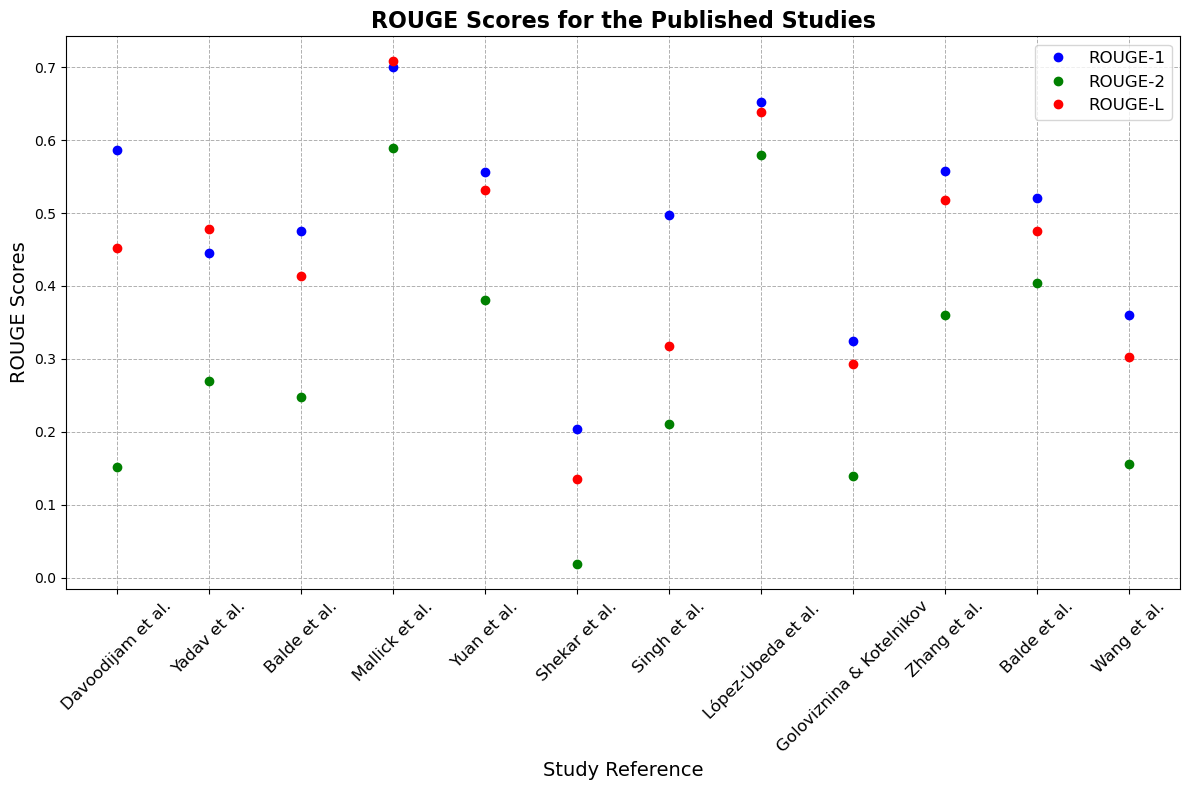

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# df = pd.read_csv('your_file.csv')  # Example of loading a DataFrame from a CSV file

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X-axis positions
x = np.arange(len(df))

# Plot dots for each ROUGE metric
ax.plot(x, df['ROUGE-1'], 'o', color='b', label='ROUGE-1', linestyle='none')
ax.plot(x, df['ROUGE-2'], 'o', color='g', label='ROUGE-2', linestyle='none')
ax.plot(x, df['ROUGE-L'], 'o', color='r', label='ROUGE-L', linestyle='none')

# Add labels with increased font size
ax.set_xlabel('Study Reference', fontsize=14)
ax.set_ylabel('ROUGE Scores', fontsize=14)
ax.set_title('ROUGE Scores for the Published Studies', fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(df['Study Reference'], rotation=45, fontsize=12)  # Increase font size of x-axis labels

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Add legend with increased font size
ax.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
def get_validation_scores():
    # Create the DataFrame
    validation_scores_table = pd.DataFrame({
        'Model': [
            't5-large_num_beams_4',
            'bart-large-cnn_num_beams_4',
            'led-large-16384_num_beams_4'
        ],
        'BLEU': [0.004328, 0.005843, 0.010703],
        'ROUGE-1': [0.180808, 0.204325, 0.152444],
        'ROUGE-2': [0.042278, 0.052606, 0.034912],
        'ROUGE-L': [0.105558, 0.116859, 0.078366]
    })

    return validation_scores_table

# Get the table
table = get_validation_scores()

# Display the table
table


,Model,BLEU,ROUGE-1,ROUGE-2,ROUGE-L
0,t5-large_num_beams_4,0.004328,0.180808,0.042278,0.105558
1,bart-large-cnn_num_beams_4,0.005843,0.204325,0.052606,0.116859
2,led-large-16384_num_beams_4,0.010703,0.152444,0.034912,0.078366
